<a href="https://colab.research.google.com/github/roshangeoroy/CommunicationSimulations/blob/main/PCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Performance of Waveform Coding Using PCM**
1. Generate a sinusoidal waveform with a DC offset so that it takes only
positive amplitude value.
2. Sample and quantize the signal using an uniform quantizer with number of
representation levels L. Vary L. Represent each value using decimal to
binary encoder.
3. Compute the signal-to-noise ratio in dB.
4. Plot the SNR versus number of bits per symbol. Observe that the SNR
increases linearly. 

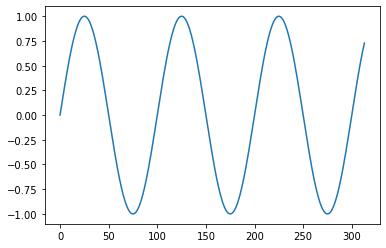

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t=np.arange(0,3.14,0.01)
a=np.sin(2*np.pi*t)
plt.plot(a)

#ADC
**Sampling**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


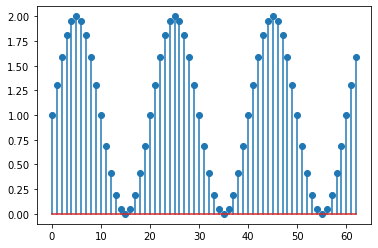

In [ ]:
n=np.arange(0,3.14,0.05) #sampling rate = 1/0.05 Hz
a=1+np.sin(2*np.pi*n) # maximum frequency of signal = 1Hz
plt.stem(a);

**Quantizing**

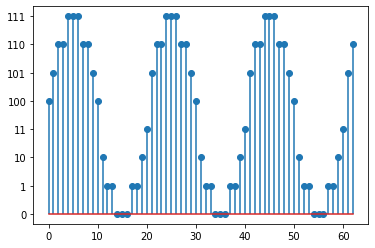

In [ ]:
#L=int(input("Enter number of Representation Levels "))
L=8
max=np.max(a)
min=np.min(a)
treshold_levels= np.linspace(min,max,L)
treshold_levels
q =(max-min)/(L-1)
y = q * np.round(a/q)
l=list(range(L))
l=["{0:b}".format(i) for i in l]
plt.stem(y,use_line_collection=True);
plt.yticks(treshold_levels,labels=l);



In [ ]:
def power(y):
    p=(np.linalg.norm(y))**2 / y.size
    return p

SNR=20*np.log10(12*power(a)/(q*q))
print(SNR)



46.935429806334014


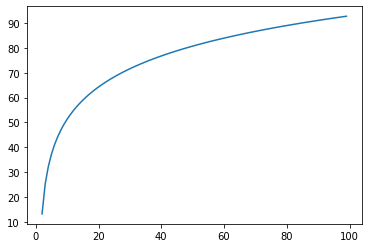

In [78]:
L1=np.arange(2,100)
SNR=[]
for L in L1:
  min=np.round(np.min(a))
  max=np.round(np.max(a))
  q =(max-min)/(L-1)
  SNR.append(20*np.log10(12*power(a)/(q*q)))
  
plt.plot(L1,SNR)